In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#### Load data

In [2]:
df_housing=pd.read_csv('housing.txt')
df_housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [3]:
len(df_housing)

20640

In [4]:
df=df_housing.copy()

In [5]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

#### Look at the median_house_value variable. Does it have a long tail?

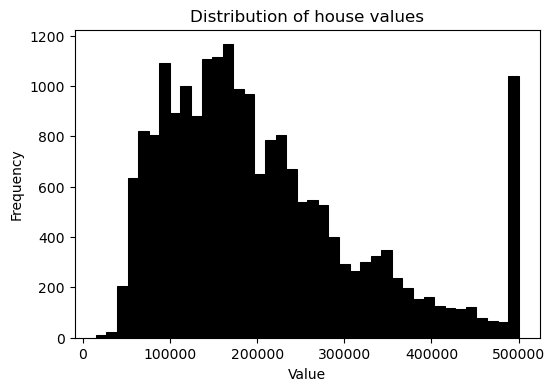

In [6]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title('Distribution of house values')

plt.show()

It does seem to have something of a tail...

#### For this homework, we only want to use a subset of data.
First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'.
Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

In [7]:
df.groupby(['ocean_proximity']).agg({'ocean_proximity':'count'})

,ocean_proximity
ocean_proximity,
<1h_ocean,9136
inland,6551
island,5
near_bay,2290
near_ocean,2658


In [8]:
df=df[
    (df['ocean_proximity'] == '<1h_ocean')
    | (df['ocean_proximity'] == 'inland')
]

df=df.reset_index(drop=True)

In [9]:
df=df[[
        'latitude',
        'longitude',
        'housing_median_age',
        'total_rooms',
        'total_bedrooms',
        'population',
        'households',
        'median_income',
        'median_house_value'
       ]]

#### Question 1
There's one feature with missing values. What is it?

total_rooms
total_bedrooms
population
households

In [10]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

The feature with missing values is - total_bedrooms 

#### Question 2
What's the median (50% percentile) for variable 'population'?

995
1095
1195
1295

In [11]:
df['population'].median()

1195.0

The median for variable "population" is 1195

#### Prepare and split the dataset
1- Shuffle the dataset (the filtered one you created above), use seed 42.
2- Split your data in train/val/test sets, with 60%/20%/20% distribution.
3- Apply the log transformation to the median_house_value variable using the np.log1p() function.

#### 1) Shuffle the dataset (the filtered one you created above), use seed 42.

In [13]:
n = len(df)
np.random.seed(42)

idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

df_shuffled

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15183,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
4469,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
9316,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
4983,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
13154,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0
...,...,...,...,...,...,...,...,...,...
5191,34.15,-118.14,41.0,1256.0,407.0,855.0,383.0,1.9923,500001.0
13418,37.40,-121.86,19.0,4043.0,764.0,2196.0,708.0,6.1504,268400.0
5390,34.07,-118.15,52.0,1983.0,344.0,887.0,331.0,3.2875,234400.0
860,36.78,-119.81,37.0,1965.0,364.0,796.0,335.0,3.6250,83400.0


#### 2) Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [14]:
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

#### 3) Apply the log transformation to the median_house_value variable using the np.log1p() function.

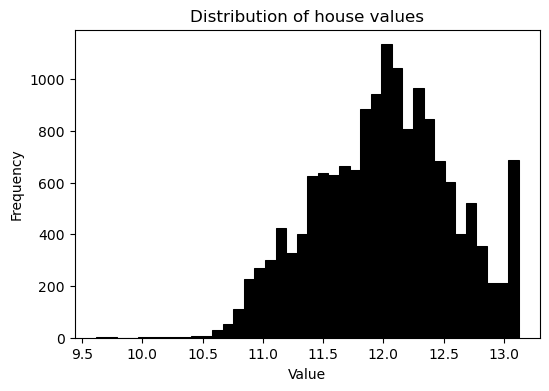

In [15]:
plt.figure(figsize=(6, 4))

log_house_val = np.log1p(df.median_house_value)

sns.histplot(log_house_val, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title('Distribution of house values')

plt.show()

It seems like the distribution shifted from left to right...

In [16]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

#### Question 3
1) We need to deal with missing values for the column from Q1. We have two options: fill it with 0 or with the mean of this variable.Try both options. For each, train a linear regression model without regularization using the code from the lessons. For computing the mean, use the training only!

2) Use the validation dataset to evaluate the models and compare the RMSE of each option. Round the RMSE scores to 2 decimal digits using round(score, 2). Which option gives better RMSE?

Options:

With 0
With mean
Both are equally good

#### Linear Regression

In [28]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

##### Filling missing values with 0

In [30]:
def prepare_X(df, option):
    if option == '0':
        df_num = df.copy()
        df_num = df_num.fillna(0)
        X = df_num.values
    else:
        mean_tot_bed = df['total_bedrooms'].mean()        
        df_num = df.copy()
        df_num = df_num.fillna(mean_tot_bed)
        X = df_num.values        
    return X

In [43]:
X_train = prepare_X(df_train,'0')
w_0, w = train_linear_regression(X_train, y_train)

In [44]:
y_pred = w_0 + X_train.dot(w)

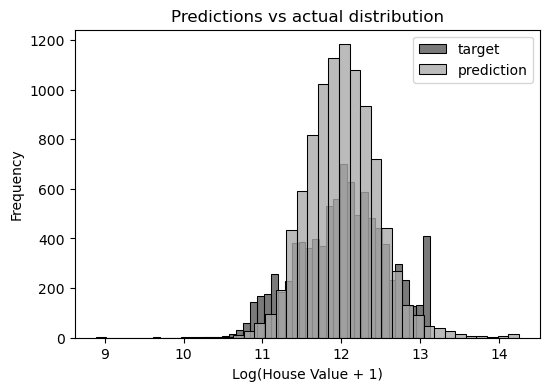

In [38]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(House Value + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [34]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [45]:
round(rmse(y_train, y_pred),2) #zeroes version

0.34

In [40]:
round(rmse(y_train, y_pred),2) #mean version

0.34

Answer: Both methods produce basically the same result;

#### Question 4
Now let's train a regularized linear regression.

For this question, fill the NAs with 0.

Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].

Use RMSE to evaluate the model on the validation dataset. Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE? If there are multiple options, select the smallest r.

Options:

0
0.000001
0.001
0.0001

#### Reguralization

In [46]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [47]:
X_train = prepare_X(df_train,'0')

In [50]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_train.dot(w)
    
    print(r)
    print(rmse(y_train, y_pred))    

0
0.3402719715829534
0.001
0.34027200293364984
0.01
0.34027499089643215
0.1
0.34048643951065993
1
0.34350313673468913
10
0.34663477204828363


Answer is 0;

#### Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score. Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

0.5
0.05
0.005
0.0005

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [64]:
n = len(df)
x=[]

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)

    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]

    df_shuffled
    
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train = prepare_X(df_train,'0')
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_train.dot(w)
    
    print (s)
    print (rmse(y_train, y_pred))
    x.append(rmse(y_train, y_pred))
    

0
0.3329960901830774
1
0.3353252773564013
2
0.34027582719351995
3
0.34113309552034804
4
0.33477032052155886
5
0.33826950586175225
6
0.3373472793170269
7
0.33429960121706737
8
0.3345971000834781
9
0.3410686752346688


In [65]:
std_deviation = np.std(x)
round(std_deviation,3)

0.003

Answer: Std is 0.003

#### Question 6 

Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?

Options:

0.13
0.23
0.33
0.43

In [74]:

n = len(df)
x=[]

s=9
   
np.random.seed(s)

idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

df_shuffled

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train=pd.concat([df_train, df_val])

y_train = np.log1p(df_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [79]:
X_train = prepare_X(df_train, '0')
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_test = prepare_X(df_test, '0')
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

test: 0.33498993366089475


Answer: 0.33